In [1]:
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset

from src import VRAE
from src.utils import *

In [2]:
n_epochs = 100

hidden_size = 90
hidden_layer_depth = 1
latent_length = 20
batch_size = 8
learning_rate = 0.0005
dropout_rate = 0.2
optimizer = 'Adam' # options: ADAM, SGD
cuda = False # options: True, False
print_every=30
clip = True # options: True, False
max_grad_norm=5
loss = 'MSELoss' # options: SmoothL1Loss, MSELoss
block = 'LSTM' # options: LSTM, GRU
saved_model_path = './saved_models'

In [3]:
directory_list = get_files_directory_list()
random_index = 85
random_path = directory_list[random_index]
X_train, X_val, y_train, y_val = get_data_from_directory(random_path)
X, y = get_data_from_directory(random_path, split=False)

In [4]:
num_classes = len(np.unique(y_train))
base = np.min(y_train)  # Check if data is 0-based
if base != 0:
    y_train -= base
y_val -= base

In [5]:
train_dataset = TensorDataset(torch.from_numpy(X_train))
test_dataset = TensorDataset(torch.from_numpy(X_val))

In [6]:
sequence_length = X_train.shape[1]

In [7]:
number_of_features = X_train.shape[2]

In [8]:
vrae = VRAE(sequence_length=sequence_length,
            number_of_features = number_of_features,
            hidden_size = hidden_size, 
            hidden_layer_depth = hidden_layer_depth,
            latent_length = latent_length,
            batch_size = batch_size,
            learning_rate = learning_rate,
            n_epochs = n_epochs,
            dropout_rate = dropout_rate,
            optimizer = optimizer, 
            cuda = cuda,
            print_every=print_every, 
            clip=clip, 
            max_grad_norm=max_grad_norm,
            loss = loss,
            block = block,
            dload = saved_model_path)

/home/samir/anaconda3/envs/py36/lib/python3.6/site-packages/torch/nn/modules/rnn.py:51: UserWarning:

dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1

/home/samir/anaconda3/envs/py36/lib/python3.6/site-packages/torch/nn/_reduction.py:43: UserWarning:

size_average and reduce args will be deprecated, please use reduction='sum' instead.



In [9]:
vrae.fit(train_dataset)

Epoch: 0
Average loss: 34.8509
Epoch: 1
Average loss: 12.2903
Epoch: 2
Average loss: 10.0304
Epoch: 3
Average loss: 9.5378
Epoch: 4
Average loss: 9.4338
Epoch: 5
Average loss: 9.1206
Epoch: 6
Average loss: 9.1943
Epoch: 7
Average loss: 8.9481
Epoch: 8
Average loss: 8.8759
Epoch: 9
Average loss: 8.9748
Epoch: 10
Average loss: 8.7738
Epoch: 11
Average loss: 8.7731
Epoch: 12
Average loss: 9.0007
Epoch: 13
Average loss: 8.8029
Epoch: 14
Average loss: 8.7300
Epoch: 15
Average loss: 8.7340
Epoch: 16
Average loss: 8.7209
Epoch: 17
Average loss: 8.7206
Epoch: 18
Average loss: 8.6404
Epoch: 19
Average loss: 8.5692
Epoch: 20
Average loss: 8.5448
Epoch: 21
Average loss: 8.3726
Epoch: 22
Average loss: 8.2477
Epoch: 23
Average loss: 8.0845
Epoch: 24
Average loss: 7.9667
Epoch: 25
Average loss: 7.8760
Epoch: 26
Average loss: 7.7522
Epoch: 27
Average loss: 7.7313
Epoch: 28
Average loss: 7.6789
Epoch: 29
Average loss: 7.5341
Epoch: 30
Average loss: 7.5192
Epoch: 31
Average loss: 7.5005
Epoch: 32
Avera

In [11]:
vrae.save('vrae.pth')
vrae.load(saved_model_path+'/vrae.pth')

In [12]:
z_run = vrae.transform(train_dataset)

SmoothSubspace


No handles with labels found to put in legend.


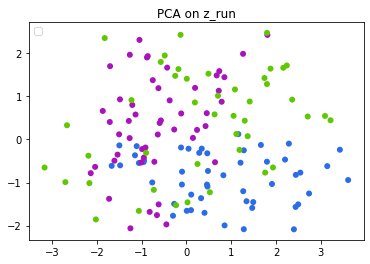

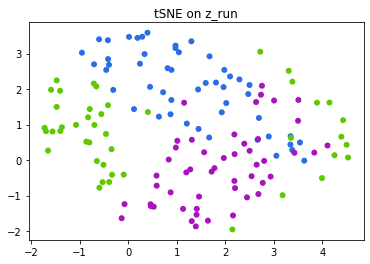

In [13]:
print(random_path)
plot_clustering(z_run, y_val, engine='matplotlib', download = False)